### Ternary plots using the 'Python Ternary' package

https://github.com/marcharper/python-ternary

> pip install python-ternary


Agile has done a nice blog post on the ternary plot package 

https://agilescientific.com/blog/2019/3/21/x-lines-of-python-ternary-diagrams

https://github.com/agile-geoscience/xlines/blob/master/notebooks/12_Ternary_diagrams.ipynb


In [264]:
import ternary
import pandas as pd
%matplotlib inline

### Make a dataframe with some chloride, bicarbonate, and sulfate data from Giggenbarch 1988

In [265]:
data = {
    'location' : ['Kawa_Idjen_KI',
                  'Omapere_NG',
                  'Wairakei_WK-66',
                  'Georginas_ZU',
                  'Acque_AA', 
                  'Seawater',
                  'test'
                 ],
    
    'Cl' : [21800, 25, 1675, 16, 163, 19340, 20],
    'SO4' : [62400, 1, 30, 1520, 1470, 2710, 20], # < 1 has been called 1
    'HCO3' : [0, 295, 5, 0, 1403, 140, 20], # < 5 has been called 5
    
    'type' : ['acid spring',
              'soda spring',
              'reservoir',
              'acid spring',
              'soda spring',
              'sea water',
              'test'
             ]
}

df = pd.DataFrame(data)
df

,location,Cl,SO4,HCO3,type
0,Kawa_Idjen_KI,21800,62400,0,acid spring
1,Omapere_NG,25,1,295,soda spring
2,Wairakei_WK-66,1675,30,5,reservoir
3,Georginas_ZU,16,1520,0,acid spring
4,Acque_AA,163,1470,1403,soda spring
5,Seawater,19340,2710,140,sea water
6,test,20,20,20,test


### Calculate the % of each ion relitive to total Cl + SO4 + HCO3

In [266]:
df['Cl%'] = df.Cl / (df.Cl + df.SO4 +  df.HCO3) * 100
df['SO4%'] = df.SO4 / (df.Cl + df.SO4 +  df.HCO3) * 100
df['HCO3%'] = df.HCO3 / (df.Cl + df.SO4 +  df.HCO3) * 100

df

,location,Cl,SO4,HCO3,type,Cl%,SO4%,HCO3%
0,Kawa_Idjen_KI,21800,62400,0,acid spring,25.890736,74.109264,0.000000
1,Omapere_NG,25,1,295,soda spring,7.788162,0.311526,91.900312
2,Wairakei_WK-66,1675,30,5,reservoir,97.953216,1.754386,0.292398
3,Georginas_ZU,16,1520,0,acid spring,1.041667,98.958333,0.000000
4,Acque_AA,163,1470,1403,soda spring,5.368906,48.418972,46.212121
5,Seawater,19340,2710,140,sea water,87.156377,12.212708,0.630915
6,test,20,20,20,test,33.333333,33.333333,33.333333


### Make a ternary plot for classifying geothermal water type based on relative proportion of chloride, sulphate and bicarbonate ions


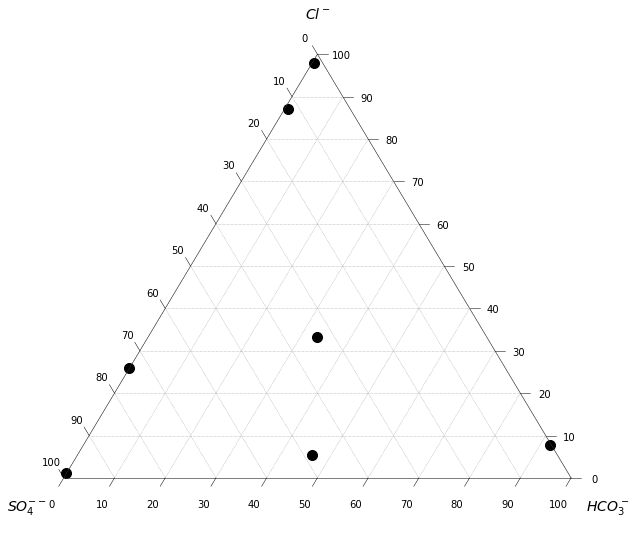

In [267]:
fig, tax = ternary.figure(scale = 100)
fig.set_size_inches(10,9)

# Make a simple scatter of all data
tax.scatter(df[['HCO3%','Cl%','SO4%']].values,
            marker = 'o', s = size_l, color = 'k')

# Corner labels
fontsize = 14
offset = 0.08
tax.top_corner_label('$Cl^-$', fontsize=fontsize, offset=0.2)
tax.left_corner_label('$SO_4^{--}$', fontsize=fontsize, offset=offset)
tax.right_corner_label('$HCO_3^-$', fontsize=fontsize, offset=offset)

# Decoration
tax.boundary(linewidth = 0.5)
tax.gridlines(multiple=10, color = 'gray')
tax.ticks(axis = 'rlb', offset = 0.02,linewidth = 0.5, multiple = 10)
tax.get_axes().axis('off')

tax.show()

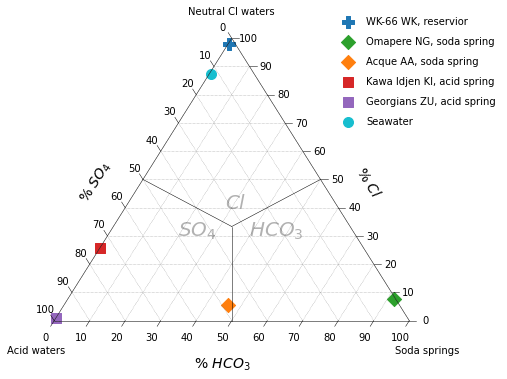

In [291]:
fig, tax = ternary.figure(scale = 100)
fig.set_size_inches(7,6)

# corner order is right, top, left
# so 'HCO3%','Cl%','SO4%'

size_l = 100
size_xl = 150

df_WK = df.query("location == 'Wairakei_WK-66'").copy()
tax.scatter(df_WK[['HCO3%','Cl%','SO4%']].values, 
            marker = 'P', s = size_xl, color = 'tab:blue', 
            label = 'WK-66 WK, reservior')

df_NG = df.query("location == 'Omapere_NG'").copy()
tax.scatter(df_NG[['HCO3%','Cl%','SO4%']].values, 
            marker = 'D', s = size_l, color = 'tab:green', 
            label = 'Omapere NG, soda spring')

df_AA = df.query("location == 'Acque_AA'").copy()
tax.scatter(df_AA[['HCO3%','Cl%','SO4%']].values, 
            marker = 'D', s = size_l, color = 'tab:orange', 
            label = 'Acque AA, soda spring')

df_KI = df.query("location == 'Kawa_Idjen_KI'").copy()
tax.scatter(df_KI[['HCO3%','Cl%','SO4%']].values, 
            marker = 's', s = size_l, color = 'tab:red', 
            label = 'Kawa Idjen KI, acid spring')

df_ZU = df.query("location == 'Georginas_ZU'").copy()
tax.scatter(df_ZU[['HCO3%','Cl%','SO4%']].values, 
            marker = 's', s = size_l, color = 'tab:purple', 
            label = 'Georgians ZU, acid spring')

df_SW = df.query("location == 'Seawater'").copy()
tax.scatter(df_SW[['HCO3%','Cl%','SO4%']].values, 
            marker = 'o', s = size_l, color = 'tab:cyan', 
            label = 'Seawater')

'''
df_TST = df.query("location == 'test'").copy()
tax.scatter(df_TST[['HCO3%','Cl%','SO4%']].values, 
            marker = 'o', s = size_l, color = 'k', 
            label = 'Test')
'''

tax.legend(frameon=False,
           labelspacing=1,
           bbox_to_anchor=(0.7, 0.56, 0.5, 0.5))

# Corner labels
fontsize = 10
offset = 0.05
tax.top_corner_label('Neutral Cl waters', fontsize = fontsize, offset=0.2)
tax.left_corner_label('Acid waters', fontsize = fontsize, offset=0.001)
tax.right_corner_label('Soda springs', fontsize = fontsize, offset=0.001)

#plt.suptitle("Geothermal Water Types", fontsize=18)

# Set axis labels
fontsize = 14
tax.left_axis_label('% $SO_4$', fontsize=fontsize, offset=0.14)
tax.right_axis_label('% $Cl$', fontsize=fontsize, offset=0.14)
tax.bottom_axis_label('% $HCO_3$', fontsize=fontsize, offset=0.1)

# Decoration
tax.boundary(linewidth = 0.5)
tax.gridlines(multiple = 10, color = 'gray')
tax.ticks(axis = 'rlb', offset = 0.02,linewidth = 0.5, multiple = 10)
# r = right, l = left and b = bottom
tax.get_axes().axis('off')

centre = [100/3,100/3,100/3]
lefthalf = [0,50,50]
righthalf = [50,50,0]
bottomhalf = [50,0,50]

tax.line(centre, lefthalf, linewidth = 0.5, color = 'k', linestyle = '-')
tax.line(centre, righthalf, linewidth = 0.5, color = 'k', linestyle = '-')
tax.line(centre, bottomhalf, linewidth = 0.5, color = 'k', linestyle = '-')

tax.annotate('$Cl$',[28,40,40],fontsize = 20, alpha=0.3)
tax.annotate('$SO_4$',[20,30,40],fontsize = 20, alpha=0.3)
tax.annotate('$HCO_3$',[40,30,40],fontsize = 20, alpha=0.3)

plt.savefig('test.png',dpi=300,bbox_inches='tight')
#tax.show()